In [ ]:
!wget -O Bone_Age_Training_Set.zip "https://s3.amazonaws.com/east1.public.rsna.org/AI/2017/Bone+Age+Training+Set.zip"


--2023-06-03 22:48:10--  https://s3.amazonaws.com/east1.public.rsna.org/AI/2017/Bone+Age+Training+Set.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.217.240, 52.216.94.141, 52.216.35.136, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.217.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9799344140 (9.1G) [application/zip]
Saving to: ‘Bone_Age_Training_Set.zip’

Bone_Age_Training_S 100%[===================>]   9.13G  79.7MB/s    in 1m 52s  

2023-06-03 22:50:02 (83.1 MB/s) - ‘Bone_Age_Training_Set.zip’ saved [9799344140/9799344140]



In [ ]:
import zipfile

zip_path = "Bone_Age_Training_Set.zip"
extract_path = "/content/extracted_files"  # Specify the path where you want to extract the files

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
import cv2
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from google.colab.patches import cv2_imshow
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
def extract_features(path):

  # using cv2 to read the image from the specified path
  original = cv2.imread(path)

  # check to verify if the path is valid and the image is correctly read
  if original is not None:

    # resizing the original image
    original = cv2.resize(original,(32,32))

    # converting the original image to gray scale
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

    # applying Gaussian Blur filter to reduce noise in the image
    original_blur = cv2.GaussianBlur(original_gray, (3,3), 0)

    # applying Sobel Edge Detection filter
    # for feature extraction
    sobelx = cv2.Sobel(src=original_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
    sobely = cv2.Sobel(src=original_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) 
    sobelxy = sobelx+sobely

    # converting the edge extracted image into to a numpy array
    arr = np.array(sobelxy)

    # reshaping the numpy array to 1D array
    arr = arr.reshape(32*32)

    # return the final numpy 1D array
    return arr
# list to store the final data after feature extraction
final_data = []

path = '/content/extracted_files/boneage-training-dataset'

os.chdir(path)

images = os.listdir()

# for each image in the directory
for x in tqdm(images):
  
  # get the label of that image
  label = x.split('.')[0]

  final_path = path +'/'+x

  # extract the features of that paticular image
  features = extract_features(final_path)

  # store the features and label in a list and append it to final_data
  data = [int(label), features]
  final_data.append(data)

  # print(data)

# at the end of the cell, final_data has all the feature of each image in the directory

100%|██████████| 12611/12611 [07:00<00:00, 29.98it/s]


In [ ]:
!wget -O Bone_Age_Training_Set_Annotations.zip https://s3.amazonaws.com/east1.public.rsna.org/AI/2017/Bone+Age+Training+Set+Annotations.zip

--2023-06-03 22:58:23--  https://s3.amazonaws.com/east1.public.rsna.org/AI/2017/Bone+Age+Training+Set+Annotations.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.166.104, 52.216.52.80, 52.217.141.80, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.166.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44679 (44K) [application/zip]
Saving to: ‘Bone_Age_Training_Set_Annotations.zip’

Bone_Age_Training_S 100%[===================>]  43.63K  --.-KB/s    in 0.02s   

2023-06-03 22:58:23 (2.18 MB/s) - ‘Bone_Age_Training_Set_Annotations.zip’ saved [44679/44679]



In [ ]:
import zipfile

zip_path = "Bone_Age_Training_Set_Annotations.zip"
extract_path = "/content/extracted_files"  # Specify the path where you want to extract the files

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
for i in range(len(final_data)):
  final_data[i][1] = list(final_data[i][1]) 
# converting the final_data list to a DataFrame 

print(len(final_data))

12611


In [ ]:
final_dataset = []
for i in range(len(final_data)):
  curr = []
  curr.append(final_data[i][0])
  for j in range(len(final_data[i][1])):
    curr.append(final_data[i][1][j])
  final_dataset.append(curr)


In [ ]:
print(final_dataset[0])
print(len(final_dataset))
# renaming first column to id
df1  = pd.DataFrame(final_dataset)

# renaming first column to id
df1 = df1.rename(columns={0:'id'})
df1.head()
     

[11402, 0.0, -46.0, -52.0, -34.0, -26.0, -32.0, -22.0, 10.0, 30.0, 12.0, -28.0, -42.0, 20.0, 320.0, 880.0, 996.0, 102.0, -906.0, -910.0, -280.0, 50.0, -50.0, -178.0, -132.0, -26.0, 24.0, 16.0, -6.0, 6.0, 28.0, 22.0, 0.0, -46.0, -84.0, -84.0, -82.0, -108.0, -138.0, -114.0, 18.0, 218.0, 292.0, 126.0, -98.0, -120.0, 312.0, 1194.0, 1606.0, 694.0, -604.0, -786.0, -22.0, 490.0, 312.0, -64.0, -184.0, -122.0, -80.0, -92.0, -108.0, -82.0, -50.0, -56.0, -78.0, -66.0, -92.0, -104.0, -140.0, -190.0, -212.0, -136.0, 190.0, 700.0, 852.0, 382.0, -152.0, -188.0, 458.0, 1582.0, 1986.0, 730.0, -854.0, -844.0, 396.0, 1042.0, 502.0, -214.0, -350.0, -196.0, -128.0, -138.0, -140.0, -110.0, -88.0, -100.0, -122.0, -90.0, -108.0, -142.0, -196.0, -226.0, -214.0, -84.0, 426.0, 1196.0, 1320.0, 468.0, -332.0, -264.0, 650.0, 1930.0, 2170.0, 524.0, -1204.0, -818.0, 890.0, 1416.0, 298.0, -688.0, -634.0, -262.0, -124.0, -114.0, -100.0, -80.0, -80.0, -102.0, -128.0, -104.0, -124.0, -166.0, -192.0, -168.0, -132.0, 6.0, 

id    1      2      3      4      5      6      7      8      9  ...  \
0  11402  0.0  -46.0  -52.0  -34.0  -26.0  -32.0  -22.0   10.0   30.0  ...   
1   2948  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2  14833  0.0  -66.0  -66.0  -34.0  -14.0  -20.0  -50.0  -50.0   -4.0  ...   
3   9270  0.0   18.0  -10.0  -58.0  -48.0    0.0   -4.0  -78.0 -144.0  ...   
4   2961  0.0  142.0  356.0  410.0  154.0 -134.0 -264.0 -344.0 -334.0  ...   

     1015    1016   1017  1018  1019   1020   1021  1022  1023  1024  
0  -140.0    28.0   14.0  30.0  42.0   12.0  -36.0 -42.0 -14.0   0.0  
1  -324.0  -158.0  -30.0   0.0   0.0    0.0    0.0   0.0   0.0   0.0  
2     6.0    22.0   50.0  64.0  80.0  106.0  100.0  64.0  28.0   0.0  
3 -2314.0 -1122.0 -336.0 -96.0 -46.0    6.0   62.0  88.0  70.0   0.0  
4  -216.0   -28.0   14.0  24.0  24.0   10.0   22.0  70.0  82.0   0.0  

[5 rows x 1025 columns]

In [ ]:
df = pd.read_csv(extract_path + '/train.csv')
# final = df.merge(df1,on='id')
# final.head()

In [ ]:
df.head()

id  boneage   male
0  1377      180  False
1  1378       12  False
2  1379       94  False
3  1380      120   True
4  1381       82  False

In [ ]:
final = df.merge(df1,on='id')

In [ ]:

final.shape

(12611, 1027)

In [ ]:
final_paths = "/content/sample_data/boneage_final.csv"
final.to_csv(final_paths)


In [ ]:
le = LabelEncoder()
final['male'] = le.fit_transform(final['male'])
final.head()

id  boneage  male    1       2       3       4       5      6      7  \
0  1377      180     0  0.0 -1352.0  -604.0   424.0    44.0 -608.0 -528.0   
1  1378       12     0  0.0    16.0    40.0    18.0   -28.0  -32.0  -12.0   
2  1379       94     0  0.0  2432.0  4390.0  4246.0  2276.0  622.0   36.0   
3  1380      120     1  0.0    68.0   444.0   572.0   -32.0 -666.0 -656.0   
4  1381       82     0  0.0   -54.0   -76.0   -56.0   -20.0   -2.0    0.0   

   ...   1015   1016   1017   1018   1019   1020   1021   1022   1023  1024  
0  ...  218.0  110.0   68.0  132.0  148.0   36.0  -26.0   52.0  100.0   0.0  
1  ...    0.0   16.0    8.0  -20.0  -28.0   -2.0    8.0  -12.0  -18.0   0.0  
2  ...    6.0   18.0   12.0 -108.0 -446.0 -806.0 -810.0 -470.0 -146.0   0.0  
3  ... -144.0 -192.0 -244.0 -278.0   20.0  610.0  712.0   88.0 -330.0   0.0  
4  ...   28.0   42.0   22.0   -6.0   12.0   40.0   36.0   32.0   28.0   0.0  

[5 rows x 1027 columns]

In [ ]:
scaled_features = final.copy()

col_names = final.columns[3:].values.tolist()
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features
print(scaled_features)

          id  boneage  male    1         2         3         4         5  \
0       1377      180     0  0.0 -1.560237 -0.583802  0.780311  0.221399   
1       1378       12     0  0.0  0.177853  0.203694  0.165015  0.103280   
2       1379       94     0  0.0  3.247461  5.522963  6.572581  3.883090   
3       1380      120     1  0.0  0.243920  0.697714  1.004606  0.096718   
4       1381       82     0  0.0  0.088915  0.061847  0.052867  0.116404   
...      ...      ...   ...  ...       ...       ...       ...       ...   
12606  15605       50     0  0.0  0.815660  1.397167  1.559281  0.720124   
12607  15606      113     0  0.0  0.043176  0.039837  0.058929  0.103280   
12608  15608       55     0  0.0 -0.345607 -0.302553 -0.104746  0.234523   
12609  15609      150     1  0.0  0.391302  0.443367  0.322627  0.083593   
12610  15610      132     1  0.0 -0.147404 -0.219401 -0.468468 -0.818705   

              6         7  ...      1015      1016      1017      1018  \
0     -0.9373

In [ ]:
final_paths = "/content/sample_data/scaled_boneage.csv"
scaled_features.to_csv(final_paths)


In [ ]:
print(scaled_features.head())

     id  boneage  male    1         2         3         4         5         6  \
0  1377      180     0  0.0 -1.560237 -0.583802  0.780311  0.221399 -0.937382   
1  1378       12     0  0.0  0.177853  0.203694  0.165015  0.103280  0.119956   
2  1379       94     0  0.0  3.247461  5.522963  6.572581  3.883090  1.320475   
3  1380      120     1  0.0  0.243920  0.697714  1.004606  0.096718 -1.043850   
4  1381       82     0  0.0  0.088915  0.061847  0.052867  0.116404  0.175026   

          7  ...      1015      1016      1017      1018      1019      1020  \
0 -0.987514  ...  0.563162  0.365317  0.235397  0.326632  0.315830 -0.005371   
1  0.177927  ...  0.348038  0.233157  0.120522 -0.026721 -0.111723 -0.092013   
2  0.286341  ...  0.353959  0.235969  0.128180 -0.231294 -1.127160 -1.925179   
3 -1.276616  ...  0.205937 -0.059281 -0.361955 -0.626492  0.004882  1.303382   
4  0.205031  ...  0.375668  0.269712  0.147326  0.005824 -0.014552  0.003749   

       1021      1022      1023 

In [ ]:
print(scaled_features)

          id  boneage  male    1         2         3         4         5  \
0       1377      180     0  0.0 -1.560237 -0.583802  0.780311  0.221399   
1       1378       12     0  0.0  0.177853  0.203694  0.165015  0.103280   
2       1379       94     0  0.0  3.247461  5.522963  6.572581  3.883090   
3       1380      120     1  0.0  0.243920  0.697714  1.004606  0.096718   
4       1381       82     0  0.0  0.088915  0.061847  0.052867  0.116404   
...      ...      ...   ...  ...       ...       ...       ...       ...   
12606  15605       50     0  0.0  0.815660  1.397167  1.559281  0.720124   
12607  15606      113     0  0.0  0.043176  0.039837  0.058929  0.103280   
12608  15608       55     0  0.0 -0.345607 -0.302553 -0.104746  0.234523   
12609  15609      150     1  0.0  0.391302  0.443367  0.322627  0.083593   
12610  15610      132     1  0.0 -0.147404 -0.219401 -0.468468 -0.818705   

              6         7  ...      1015      1016      1017      1018  \
0     -0.9373

In [ ]:
scaled_features.isna().sum()

id         0
boneage    0
male       0
1          0
2          0
          ..
1020       0
1021       0
1022       0
1023       0
1024       0
Length: 1027, dtype: int64

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Flatten, Dense, Input
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install gpytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.0/173.0 kB 12.7 MB/s eta 0:00:00


In [ ]:
!pip install pyro-ppl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.5/732.5 kB 11.5 MB/s eta 0:00:00


In [ ]:
import torch
import gpytorch
import pyro.distributions as dist
import pyro.distributions.transforms as T
from torch import nn
from torch.distributions import MultivariateNormal
from torch.distributions.transforms import AffineTransform, ComposeTransform


In [ ]:

# Define the base distribution
base_distribution = MultivariateNormal(torch.zeros(2), torch.eye(2))


In [ ]:
import torch
import torch.nn as nn
from torch.distributions import constraints

from pyro.distributions.torch_transform import TransformModule
from pyro.distributions.util import copy_docs_from
from pyro.distributions.transforms.utils import clamp_preserve_gradients


In [ ]:
class InverseAutoregressiveFlow(TransformModule):
    """
    An implementation of Inverse Autoregressive Flow, using Eq (10) from Kingma Et Al., 2016,

        :math:`\\mathbf{y} = \\mu_t + \\sigma_t\\odot\\mathbf{x}`

    where :math:`\\mathbf{x}` are the inputs, :math:`\\mathbf{y}` are the outputs, :math:`\\mu_t,\\sigma_t`
    are calculated from an autoregressive network on :math:`\\mathbf{x}`, and :math:`\\sigma_t>0`.

    Together with `TransformedDistribution` this provides a way to create richer variational approximations.

    Example usage:

    >>> from pyro.nn import AutoRegressiveNN
    >>> base_dist = dist.Normal(torch.zeros(10), torch.ones(10))
    >>> iaf = InverseAutoregressiveFlow(AutoRegressiveNN(10, [40]))
    >>> pyro.module("my_iaf", iaf)  # doctest: +SKIP
    >>> iaf_dist = dist.TransformedDistribution(base_dist, [iaf])
    >>> iaf_dist.sample()  # doctest: +SKIP
        tensor([-0.4071, -0.5030,  0.7924, -0.2366, -0.2387, -0.1417,  0.0868,
                0.1389, -0.4629,  0.0986])

    The inverse of the Bijector is required when, e.g., scoring the log density of a sample with
    `TransformedDistribution`. This implementation caches the inverse of the Bijector when its forward
    operation is called, e.g., when sampling from `TransformedDistribution`. However, if the cached value
    isn't available, either because it was overwritten during sampling a new value or an arbitary value is
    being scored, it will calculate it manually. Note that this is an operation that scales as O(D) where D is
    the input dimension, and so should be avoided for large dimensional uses. So in general, it is cheap
    to sample from IAF and score a value that was sampled by IAF, but expensive to score an arbitrary value.

    :param autoregressive_nn: an autoregressive neural network whose forward call returns a real-valued
        mean and logit-scale as a tuple
    :type autoregressive_nn: nn.Module
    :param log_scale_min_clip: The minimum value for clipping the log(scale) from the autoregressive NN
    :type log_scale_min_clip: float
    :param log_scale_max_clip: The maximum value for clipping the log(scale) from the autoregressive NN
    :type log_scale_max_clip: float

    References:

    1. Improving Variational Inference with Inverse Autoregressive Flow [arXiv:1606.04934]
    Diederik P. Kingma, Tim Salimans, Rafal Jozefowicz, Xi Chen, Ilya Sutskever, Max Welling

    2. Variational Inference with Normalizing Flows [arXiv:1505.05770]
    Danilo Jimenez Rezende, Shakir Mohamed

    3. MADE: Masked Autoencoder for Distribution Estimation [arXiv:1502.03509]
    Mathieu Germain, Karol Gregor, Iain Murray, Hugo Larochelle
    """

    domain = constraints.real
    codomain = constraints.real
    bijective = True
    event_dim = 1
    autoregressive = True

    def __init__(self, autoregressive_nn, log_scale_min_clip=-5., log_scale_max_clip=3.):
        super(InverseAutoregressiveFlow, self).__init__(cache_size=1)
        self.arn = autoregressive_nn
        self._cached_log_scale = None
        self.log_scale_min_clip = log_scale_min_clip
        self.log_scale_max_clip = log_scale_max_clip

    def _call(self, x):
        """
        :param x: the input into the bijection
        :type x: torch.Tensor

        Invokes the bijection x=>y; in the prototypical context of a TransformedDistribution `x` is a
        sample from the base distribution (or the output of a previous flow)
        """
        mean, log_scale = self.arn(x)
        log_scale = clamp_preserve_gradients(log_scale, self.log_scale_min_clip, self.log_scale_max_clip)
        self._cached_log_scale = log_scale
        scale = torch.exp(log_scale)

        y = scale * x + mean
        return y

    def _inverse(self, y):
        """
        :param y: the output of the bijection
        :type y: torch.Tensor

        Inverts y => x. Uses a previously cached inverse if available, otherwise performs the inversion afresh.
        """
        x_size = y.size()[:-1]
        perm = self.arn.permutation
        input_dim = y.size(-1)
        x = [torch.zeros(x_size, device=y.device)] * input_dim

        # NOTE: Inversion is an expensive operation that scales in the dimension of the input
        for idx in perm:
            mean, log_scale = self.arn(torch.stack(x, dim=-1))
            inverse_scale = torch.exp(-clamp_preserve_gradients(
                log_scale[..., idx], min=self.log_scale_min_clip, max=self.log_scale_max_clip))
            mean = mean[..., idx]
            x[idx] = (y[..., idx] - mean) * inverse_scale

        x = torch.stack(x, dim=-1)
        log_scale = clamp_preserve_gradients(log_scale, min=self.log_scale_min_clip, max=self.log_scale_max_clip)
        self._cached_log_scale = log_scale
        return x

    def log_abs_det_jacobian(self, x, y):
        """
        Calculates the elementwise determinant of the log jacobian
        """
        if self._cached_log_scale is not None:
            log_scale = self._cached_log_scale
        else:
            _, log_scale = self.arn(x)
            log_scale = clamp_preserve_gradients(log_scale, self.log_scale_min_clip, self.log_scale_max_clip)
        return log_scale.sum(-1)



In [ ]:
# Define the normalizing flow
flow_transforms = [AffineTransform(loc=torch.tensor([0.0, 0.0]), scale=torch.tensor([1.0, 1.0]))]
flow_transforms.append(T.AffineAutoregressive(nn.Linear(2, 2)))
flow_transform = T.ComposeTransform(flow_transforms)
iaf = InverseAutoregressiveFlow(flow_transform)


In [ ]:
# Create a GP model
class GPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)


In [ ]:
# Define the training data
train_x = torch.randn(100, 2)
train_y = torch.randn(100)

# Create a Gaussian Process model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GPModel(train_x, train_y, likelihood)


In [ ]:

import pyro.distributions as dist

In [ ]:

# Define the normalizing flow
flow_model = dist.TransformedDistribution(base_distribution, [iaf])


In [ ]:

# Train the model
model.train()
likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
for i in range(100):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

In [ ]:
# Make predictions with uncertainty
model.eval()
likelihood.eval()
test_x = torch.randn(10, 2)
with torch.no_grad():
    output = model(test_x)
    prediction_mean = output.mean
    prediction_covar = output.covariance_matrix


In [ ]:

# Access the uncertainty estimates
print("Predicted Mean:")
print(prediction_mean)
print("\nPredicted Covariance Matrix:")
print(prediction_covar)

Predicted Mean:
tensor([-0.1980, -0.1485, -0.1912, -0.1982, -0.1982, -0.2334, -0.2076, -0.2126,
        -0.2373, -0.2063])

Predicted Covariance Matrix:
tensor([[ 5.2458e-01,  1.4013e-45,  3.1492e-22,  1.5374e-28,  0.0000e+00,
         -1.2454e-11,  7.1125e-30, -8.9265e-33, -4.9182e-16, -6.2598e-27],
        [ 1.4013e-45,  5.2003e-01,  2.1968e-41,  0.0000e+00,  0.0000e+00,
          3.4412e-41,  1.7686e-41,  2.3953e-27,  0.0000e+00,  0.0000e+00],
        [ 3.1492e-22,  2.1968e-41,  5.2430e-01,  1.6944e-21,  1.0141e-40,
         -5.7243e-12, -2.7591e-09,  1.4077e-16,  6.1101e-26, -5.0840e-09],
        [ 1.5374e-28,  0.0000e+00,  1.6944e-21,  5.2462e-01,  0.0000e+00,
          3.2489e-17,  8.3488e-28,  9.4664e-37,  3.4837e-11, -1.9637e-18],
        [ 0.0000e+00,  0.0000e+00,  1.0141e-40,  0.0000e+00,  5.2462e-01,
          0.0000e+00, -3.4959e-32, -2.3082e-30,  0.0000e+00,  0.0000e+00],
        [-1.2454e-11,  3.4412e-41, -5.7243e-12,  3.2489e-17,  0.0000e+00,
          5.0847e-01, -1.293

In [ ]:
model.eval()
likelihood.eval()
test_x = torch.randn(100, 2)
test_y = torch.randn(100)  # Ground truth values for test set

with torch.no_grad():
    output = model(test_x)
    prediction_mean = output.mean

# Calculate mean squared error (MSE)
mse = torch.mean((prediction_mean - test_y) ** 2)
print("Mean Squared Error (MSE):", mse.item())

Mean Squared Error (MSE): 1.004669427871704


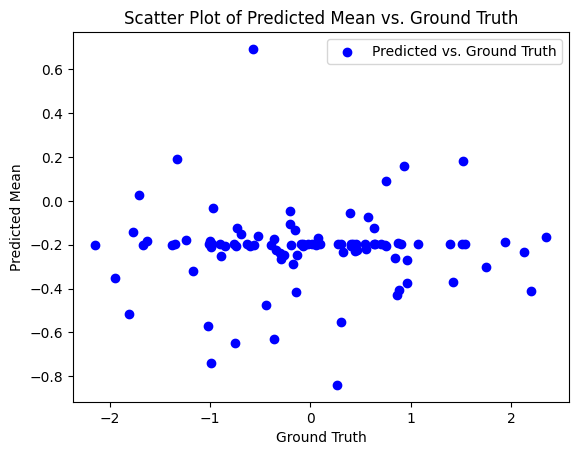

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of predicted mean vs. ground truth
plt.scatter(test_y, prediction_mean, c='blue', label='Predicted vs. Ground Truth')
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Mean')
plt.title('Scatter Plot of Predicted Mean vs. Ground Truth')
plt.legend()
plt.show()

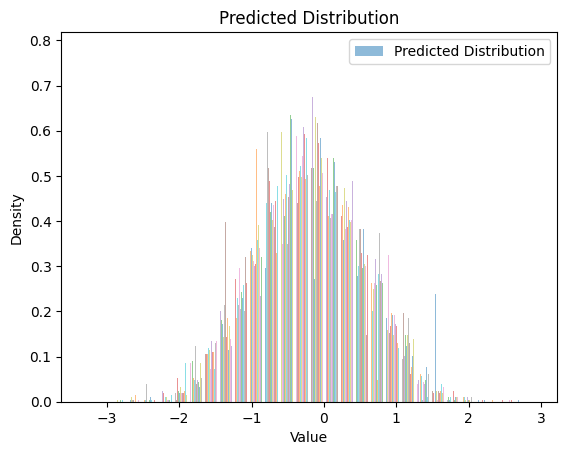

In [ ]:
with torch.no_grad():
    samples = output.sample(torch.Size([1000]))
    samples = samples.numpy()

plt.hist(samples, bins=30, density=True, alpha=0.5, label='Predicted Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Predicted Distribution')
plt.legend()
plt.show()

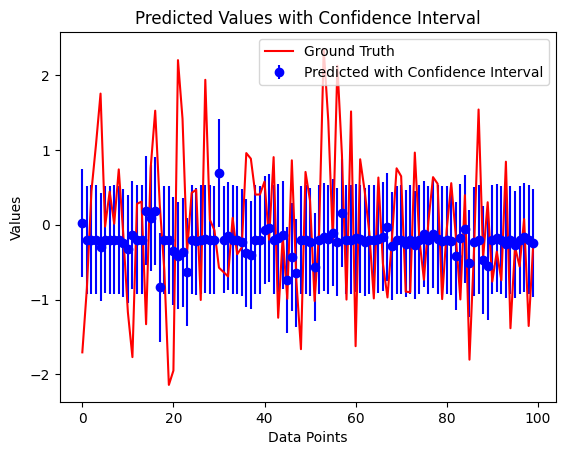

In [ ]:
# Calculate standard deviation from covariance matrix
prediction_std = torch.sqrt(torch.diag(prediction_covar))

plt.errorbar(range(len(prediction_mean)), prediction_mean, yerr=prediction_std.repeat(10), fmt='o', color='blue', label='Predicted with Confidence Interval')
plt.plot(range(len(prediction_mean)), test_y, 'r-', label='Ground Truth')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Predicted Values with Confidence Interval')
plt.legend()
plt.show()

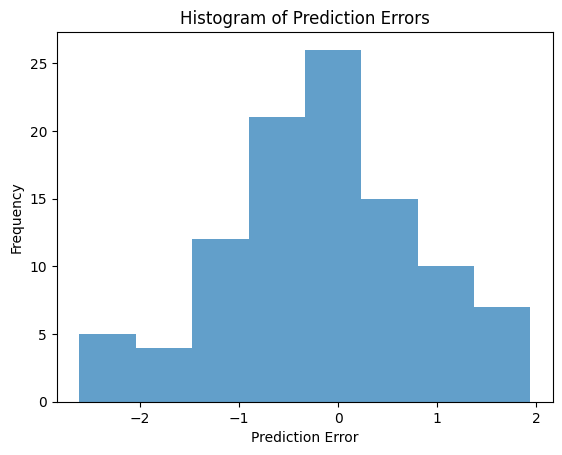

In [ ]:
# Calculate prediction errors
prediction_errors = prediction_mean - test_y

# Plot histogram of prediction errors
plt.hist(prediction_errors, bins='auto', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()

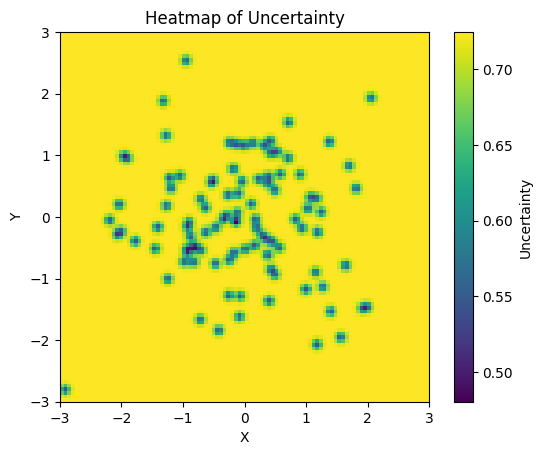

In [ ]:
import numpy as np

# Define the grid of points in the input space
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
grid_points = np.column_stack((X.ravel(), Y.ravel()))

# Get the uncertainty estimates for the grid points
with torch.no_grad():
    grid_points_tensor = torch.tensor(grid_points).float()
    output = model(grid_points_tensor)
    prediction_std = torch.sqrt(torch.diag(output.covariance_matrix))

# Reshape the uncertainty estimates to match the grid shape
Z = prediction_std.reshape(X.shape)

# Plot the heatmap of uncertainty
plt.imshow(Z, extent=[-3, 3, -3, 3], origin='lower', cmap='viridis')
plt.colorbar(label='Uncertainty')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of Uncertainty')
plt.show()

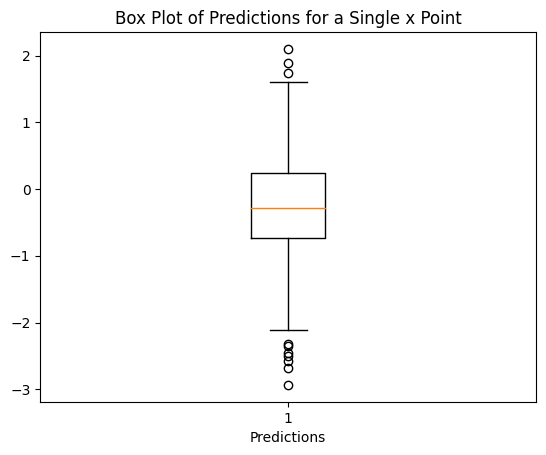

In [ ]:
# Obtain predictions for a single x point
x_point = torch.tensor([0.0, 0.0])  # Modify with your desired x point
with torch.no_grad():
    output = model(x_point.unsqueeze(0))  # Unsqueeze to match the input shape expected by the model
    predictions = output.sample(torch.Size([1000]))  # Generate multiple predictions

# Create a box plot of the predictions
plt.boxplot(predictions.numpy())
plt.xlabel('Predictions')
plt.title('Box Plot of Predictions for a Single x Point')
plt.show()

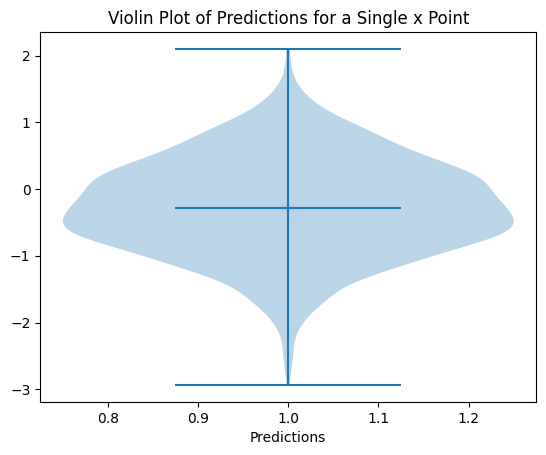

In [ ]:
# Create a violin plot of the predictions
plt.violinplot(predictions.numpy(), showmeans=False, showmedians=True)
plt.xlabel('Predictions')
plt.title('Violin Plot of Predictions for a Single x Point')
plt.show()